In [1]:
image_path = './train/HS/Health_hyper_2.tif'

(32, 32, 125)


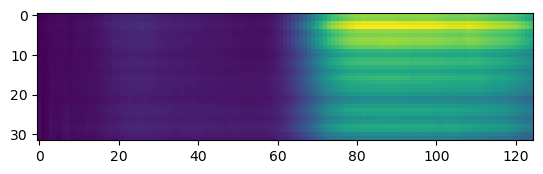

In [2]:
import tifffile
import matplotlib.pyplot as plt

img = tifffile.imread(image_path)
print(img.shape)                # Thường là (Height, Width, Bands)
# plt.imshow(img[0, :, :])      # Hiển thị băng tần đầu tiên
plt.imshow(img[1, :, :])        # Hiển thị băng tần đầu tiên
plt.show()


(32, 32, 125)


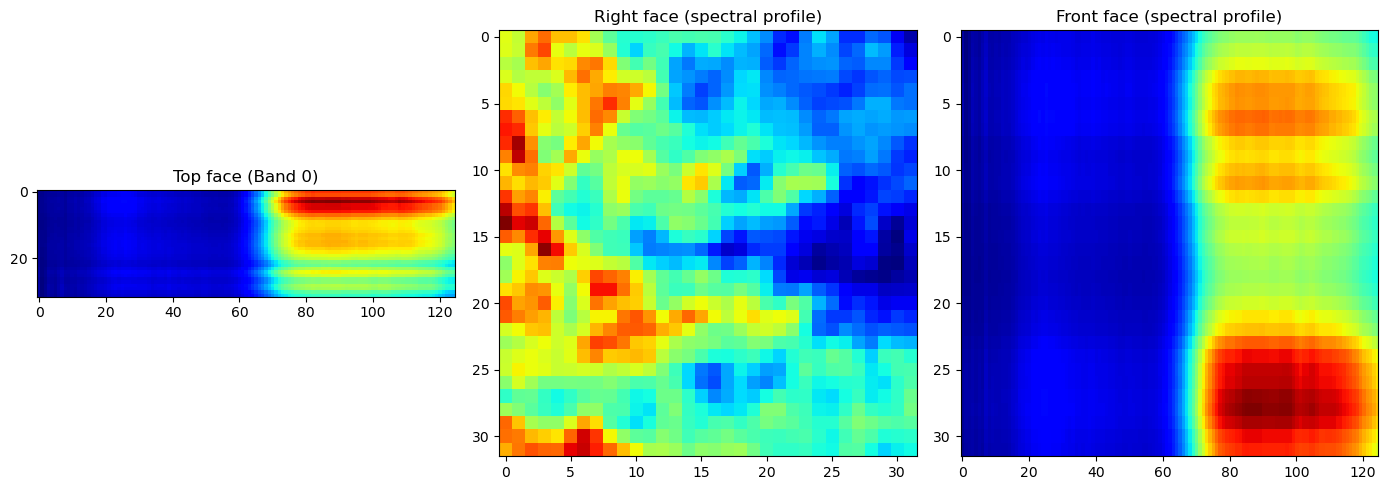

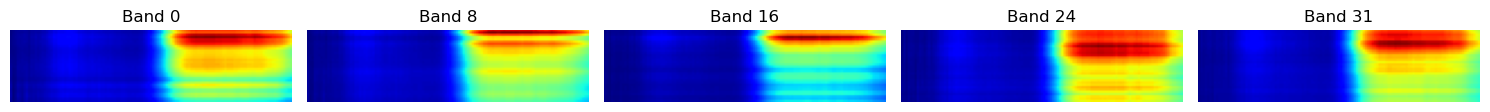

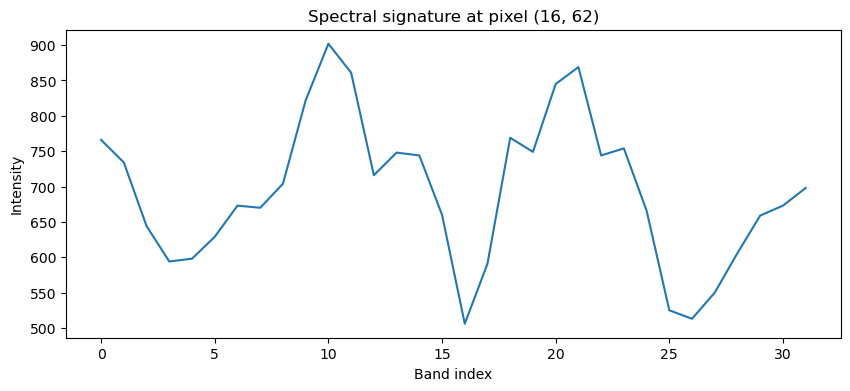

In [3]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

img = tifffile.imread(image_path)
print(img.shape)  # (Bands, Height, Width)

# Tạo figure với 2 subplots
fig = plt.figure(figsize=(14, 5))

# 1. Hiển thị các mặt của hyperspectral cube
ax1 = fig.add_subplot(131)
ax1.imshow(img[0, :, :], cmap='jet')  # Mặt trên (band đầu tiên)
ax1.set_title('Top face (Band 0)')

ax2 = fig.add_subplot(132)
ax2.imshow(img[:, :, -1], cmap='jet', aspect='auto')  # Mặt bên phải
ax2.set_title('Right face (spectral profile)')

ax3 = fig.add_subplot(133)
ax3.imshow(img[:, -1, :], cmap='jet', aspect='auto')  # Mặt trước
ax3.set_title('Front face (spectral profile)')

plt.tight_layout()
plt.show()

# 2. Hiển thị nhiều bands cùng lúc
n_bands = img.shape[0]
bands_to_show = [0, n_bands//4, n_bands//2, 3*n_bands//4, n_bands-1]

fig, axes = plt.subplots(1, len(bands_to_show), figsize=(15, 3))
for i, band_idx in enumerate(bands_to_show):
    axes[i].imshow(img[band_idx, :, :], cmap='jet')
    axes[i].set_title(f'Band {band_idx}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# 3. Hiển thị spectral signature tại một pixel
fig, ax = plt.subplots(figsize=(10, 4))
# Lấy spectral signature tại pixel trung tâm
h, w = img.shape[1]//2, img.shape[2]//2
spectrum = img[:, h, w]
ax.plot(spectrum)
ax.set_xlabel('Band index')
ax.set_ylabel('Intensity')
ax.set_title(f'Spectral signature at pixel ({h}, {w})')
plt.show()

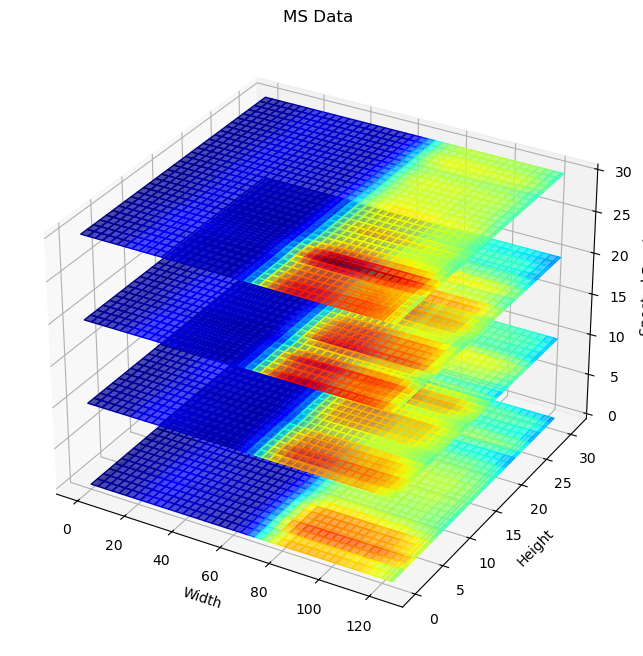

In [4]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

def plot_hyperspectral_cube(img, step=5):
    """Vẽ hyperspectral cube như trong paper"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    bands, height, width = img.shape
    
    # Normalize data
    img_norm = (img - img.min()) / (img.max() - img.min())
    
    # Vẽ một số layers đại diện
    for b in range(0, bands, step):
        X, Y = np.meshgrid(range(width), range(height))
        Z = np.full_like(X, b, dtype=float)
        
        # Color based on intensity
        colors = plt.cm.jet(img_norm[b, :, :])
        
        ax.plot_surface(X, Y, Z, facecolors=colors, 
                       shade=False, alpha=0.7)
    
    ax.set_xlabel('Width')
    ax.set_ylabel('Height')
    ax.set_zlabel('Spectral Band')
    ax.set_title('MS Data')
    plt.show()

img = tifffile.imread(image_path)
plot_hyperspectral_cube(img, step=10)